                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

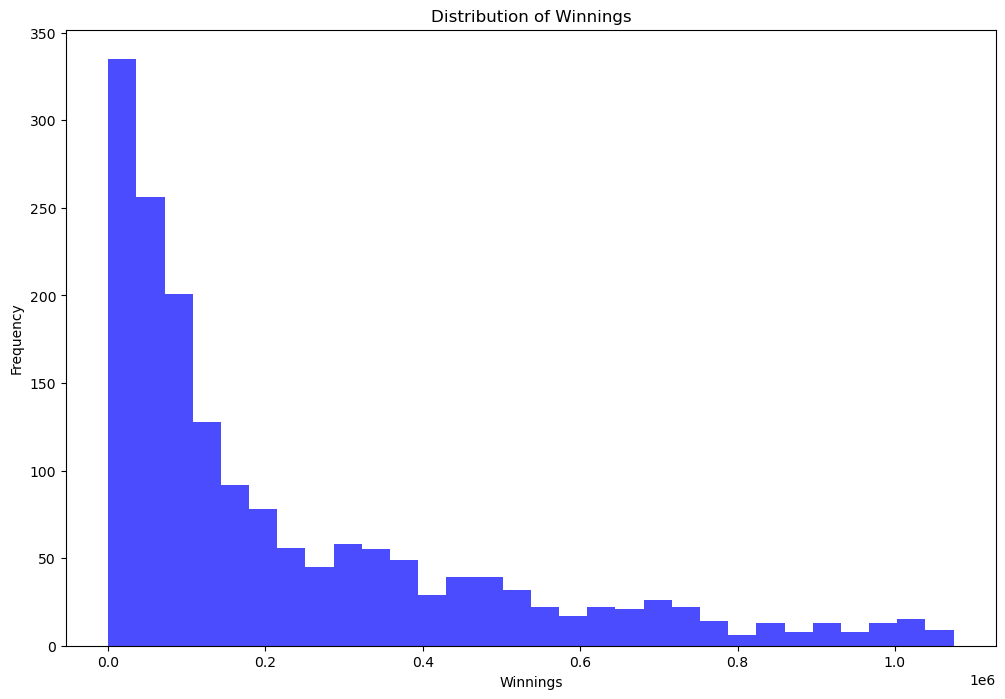

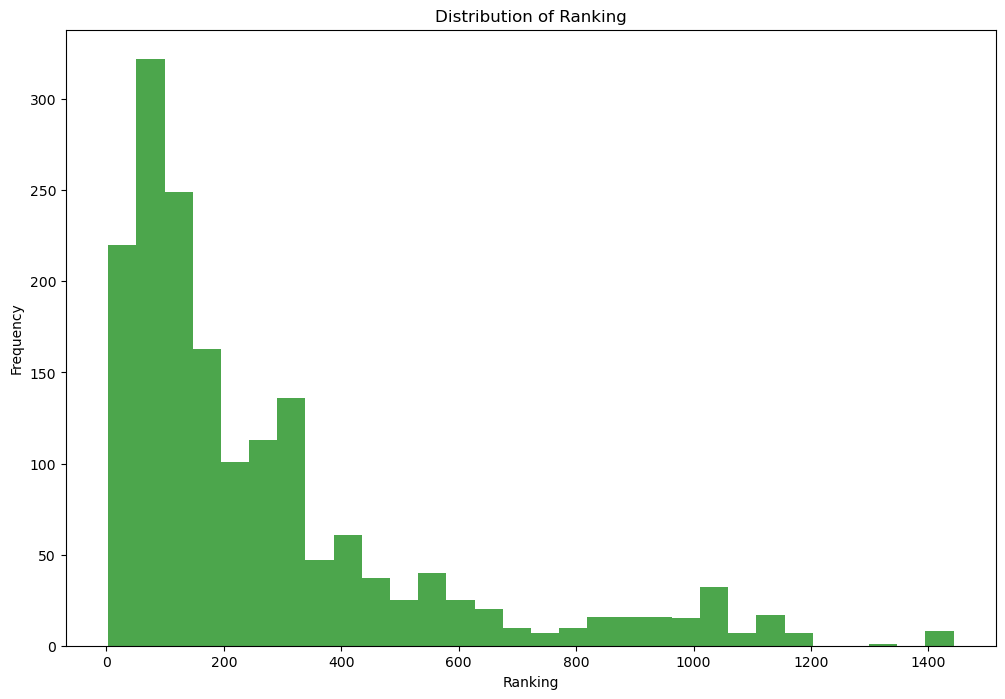

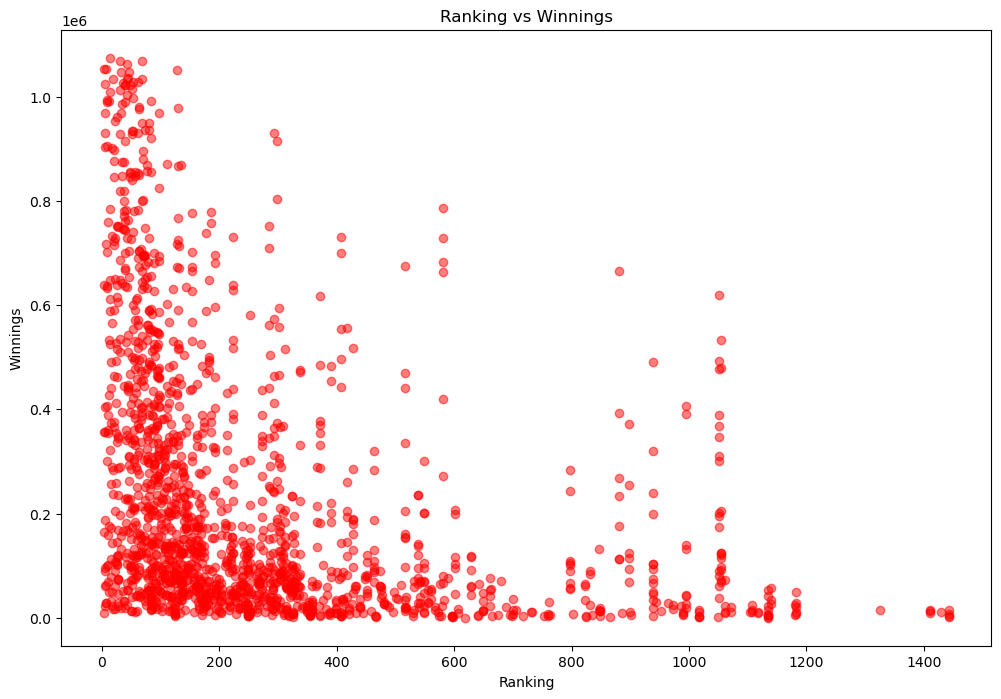

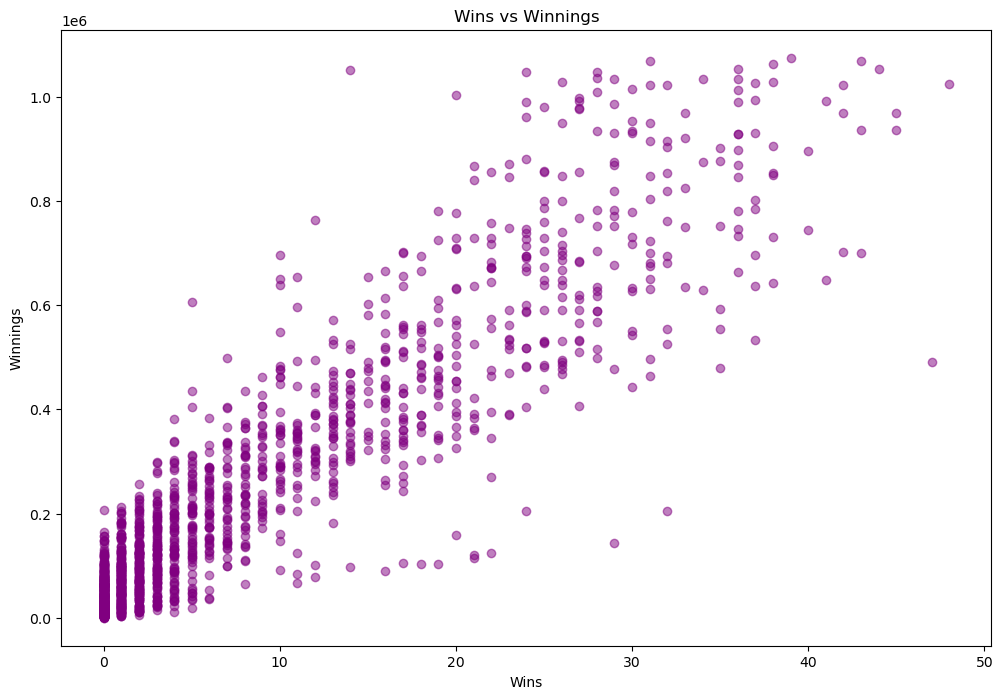

Ranking vs Winnings Regression Coefficient: [-318.16660467]
Ranking vs Winnings Regression Intercept: 322431.5183752495
Ranking vs Winnings R^2 Score: 0.15857965195824664
Wins vs Winnings Regression Coefficient: [22594.82955267]
Wins vs Winnings Regression Intercept: 54899.005549541005
Wins vs Winnings R^2 Score: 0.8417844448929318
Ranking & Wins vs Winnings Regression Coefficients: [  -93.34142685 21883.75767066]
Ranking & Wins vs Winnings Regression Intercept: 85833.94568003088
Ranking & Wins vs Winnings R^2 Score: 0.8552447483862442
Multiple Features vs Winnings Regression Coefficients: [  -73.57939026 13766.48695293  5246.70091939    79.19231345
   706.80417297 29726.72470635 10845.09241004]
Multiple Features vs Winnings Regression Intercept: 31517.110995152412
Multiple Features vs Winnings R^2 Score: 0.8761235900068165


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and investigate the data
data = pd.read_csv("tennis_stats.csv")

# Inspect the data
print(data.head())
print(data.info())
print(data.describe())

# Perform exploratory analysis

# 1. Plotting distributions of key variables
plt.figure(figsize=(12, 8))
plt.hist(data['Winnings'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Winnings')
plt.xlabel('Winnings')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
plt.hist(data['Ranking'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Ranking')
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot to see the relationship between Winnings and Ranking
plt.figure(figsize=(12, 8))
plt.scatter(data['Ranking'], data['Winnings'], color='red', alpha=0.5)
plt.title('Ranking vs Winnings')
plt.xlabel('Ranking')
plt.ylabel('Winnings')
plt.show()

# 3. Scatter plot to see the relationship between Wins and Winnings
plt.figure(figsize=(12, 8))
plt.scatter(data['Wins'], data['Winnings'], color='purple', alpha=0.5)
plt.title('Wins vs Winnings')
plt.xlabel('Wins')
plt.ylabel('Winnings')
plt.show()

# Perform single feature linear regressions

# 1. Winnings as a function of Ranking
X = data[['Ranking']]
y = data['Winnings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Ranking vs Winnings Regression Coefficient:", model.coef_)
print("Ranking vs Winnings Regression Intercept:", model.intercept_)
print("Ranking vs Winnings R^2 Score:", model.score(X_test, y_test))

# 2. Winnings as a function of Wins
X = data[['Wins']]
y = data['Winnings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Wins vs Winnings Regression Coefficient:", model.coef_)
print("Wins vs Winnings Regression Intercept:", model.intercept_)
print("Wins vs Winnings R^2 Score:", model.score(X_test, y_test))

# Perform two-feature linear regressions

# 1. Winnings as a function of Ranking and Wins
X = data[['Ranking', 'Wins']]
y = data['Winnings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Ranking & Wins vs Winnings Regression Coefficients:", model.coef_)
print("Ranking & Wins vs Winnings Regression Intercept:", model.intercept_)
print("Ranking & Wins vs Winnings R^2 Score:", model.score(X_test, y_test))

# Perform multiple feature linear regressions

# 1. Winnings as a function of multiple features
X = data[['Ranking', 'Wins', 'Losses', 'Aces', 'DoubleFaults', 'FirstServe', 'BreakPointsConverted']]
y = data['Winnings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Multiple Features vs Winnings Regression Coefficients:", model.coef_)
print("Multiple Features vs Winnings Regression Intercept:", model.intercept_)
print("Multiple Features vs Winnings R^2 Score:", model.score(X_test, y_test))


Based on the regression results and coefficients provided, here’s an interpretation of the findings:

1. Ranking vs Winnings
Regression Coefficient: -318.17
Interpretation: For each unit increase in ranking (which typically means a worse rank, as ranking numbers are higher for worse ranks), winnings decrease by approximately 318.17 units. This suggests a negative relationship: as the ranking number increases (becomes worse), the winnings decrease.
Intercept: 322431.52
Interpretation: When the ranking is zero (which is a theoretical concept since ranking usually starts from 1), the model predicts winnings to be 322,431.52. This is the baseline winnings in the absence of ranking data.
R² Score: 0.16
Interpretation: Only about 16% of the variance in winnings is explained by the ranking alone. This indicates that ranking is not a strong predictor of winnings on its own.
2. Wins vs Winnings
Regression Coefficient: 22,594.83
Interpretation: For each additional win, winnings increase by approximately 22,594.83 units. This suggests a strong positive relationship: more wins are associated with higher earnings.
Intercept: 54,899.01
Interpretation: When the number of wins is zero, the model predicts winnings to be 54,899.01. This is the baseline winnings in the absence of wins.
R² Score: 0.84
Interpretation: Approximately 84% of the variance in winnings is explained by the number of wins. This indicates a strong relationship between wins and winnings, with wins being a significant predictor of earnings.
3. Ranking & Wins vs Winnings
Regression Coefficients:
Ranking: -93.34
Interpretation: For each unit increase in ranking, winnings decrease by approximately 93.34 units, controlling for the number of wins.
Wins: 21,883.76
Interpretation: For each additional win, winnings increase by approximately 21,883.76 units, controlling for ranking.
Intercept: 85,833.95
Interpretation: When both ranking and wins are zero, the model predicts winnings to be 85,833.95.
R² Score: 0.86
Interpretation: About 86% of the variance in winnings is explained by both ranking and wins. This model improves on the individual models, indicating that both ranking and wins together provide a better explanation of winnings.
4. Multiple Features vs Winnings
Regression Coefficients:
Ranking: -73.58
Interpretation: For each unit increase in ranking, winnings decrease by approximately 73.58 units, controlling for other features.
Wins: 13,766.49
Interpretation: For each additional win, winnings increase by approximately 13,766.49 units, controlling for other features.
Losses: 5,246.70
Interpretation: For each additional loss, winnings increase by approximately 5,246.70 units, though this might be less intuitive and could indicate that higher losses are associated with higher earnings in this dataset.
Aces: 79.19
Interpretation: For each additional ace, winnings increase by approximately 79.19 units.
Double Faults: 706.80
Interpretation: For each additional double fault, winnings increase by approximately 706.80 units, which might reflect specific tournament dynamics or bonuses related to double faults.
First Serve: 29,726.72
Interpretation: For each unit increase in first serve percentage, winnings increase by approximately 29,726.72 units.
Break Points Converted: 10,845.09
Interpretation: For each additional break point converted, winnings increase by approximately 10,845.09 units.
Intercept: 31,517.11
Interpretation: When all features are zero, the model predicts winnings to be 31,517.11.
R² Score: 0.88
Interpretation: Approximately 88% of the variance in winnings is explained by the combination of multiple features. This suggests that the model with multiple features provides a very good fit and captures most of the variability in winnings.
Summary
Wins are a strong predictor of winnings, with a high R² score in the single feature regression and a significant coefficient in the multiple features model.
Ranking has a negative relationship with winnings but is a weaker predictor on its own compared to wins.
Multiple features provide a comprehensive model that explains the most variance in winnings. The coefficients for features such as wins, aces, and break points converted suggest they are significant factors in determining earnings.
Overall, focusing on wins and features related to player performance (e.g., aces, break points converted) appears to be most effective for predicting winnings.